# Processing Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read csv

In [2]:
df: pd.DataFrame = pd.read_csv("neutron25_25.csv")
df.head()
original_len = len(df['vx'])

3997

## Dynamically determine which columns are right or left and up or down

In [3]:
left_dropnames = [] # Columns to drop to get left subset
right_dropnames = [] # Columns to drop to get right subset
up_dropnames = [] # Columns to drop to get up subset
down_dropnames = [] # Columns to drop to get down subset
nx = 2
ny = 2
num = 0
for i in range(nx):
    for j in range(ny):
        if i < (nx / 2):
            print("left:",num)
            right_dropnames.append(f"photons{num}")
            right_dropnames.append(f"ypos{num}")
            right_dropnames.append(f"xpos{num}")
        else:
            print("right",num)
            left_dropnames.append(f"photons{num}")
            left_dropnames.append(f"ypos{num}")
            left_dropnames.append(f"xpos{num}")

        if j < (ny / 2):
            print("down:",num)
            up_dropnames.append(f"photons{num}")
            up_dropnames.append(f"ypos{num}")
            up_dropnames.append(f"xpos{num}")
        else:
            print('up:',num)
            down_dropnames.append(f"photons{num}")
            down_dropnames.append(f"ypos{num}")
            down_dropnames.append(f"xpos{num}")

        df = df[df[f'photons{num}'] != -1]
        num += 1

left: 0
down: 0
left: 1
up: 1
right 2
down: 2
right 3
up: 3


## Create R,L,U,D Subsets and Find totals

In [4]:
left: pd.DataFrame = df.drop(left_dropnames,axis=1)
right: pd.DataFrame = df.drop(right_dropnames,axis=1)
up: pd.DataFrame = df.drop(up_dropnames,axis=1)
down: pd.DataFrame = df.drop(down_dropnames,axis=1)

In [59]:
n = nx * ny

left['total'] = np.zeros_like(left['vx']).astype(int)
right["total"] = np.zeros_like(right['vx']).astype(int)
up['total'] = np.zeros_like(up['vx']).astype(int)
down['total'] = np.zeros_like(down['vx']).astype(int)
df["total"] = np.zeros_like(df['vx']).astype(int)
for i in range(n):
    # LEFT AND RIGHT
    try:
        left['total'] = left['total'] + left[f"photons{i}"]
    except:
        pass
    try:
        right['total'] = right['total'] + right[f"photons{i}"]
    except:
        pass

    # UP AND DOWN
    try:
        up['total'] = up['total'] + up[f'photons{i}']
    except:
        pass
    try:
        down['total'] = down['total'] + down[f'photons{i}']
    except:
        pass

    df['total'] = df['total'] + df[f"photons{i}"]

GATE = df['total'] > 100

left = left[GATE]
right = right[GATE]
up = up[GATE]
down= down[GATE]
df = df[GATE]

## Efficiency

In [60]:
print(f'Efficiency: {len(df['vx'])/original_len * 100}%')

Efficiency: 26.394796097072803%


## Plots

Text(0.5, 0, 'vx')

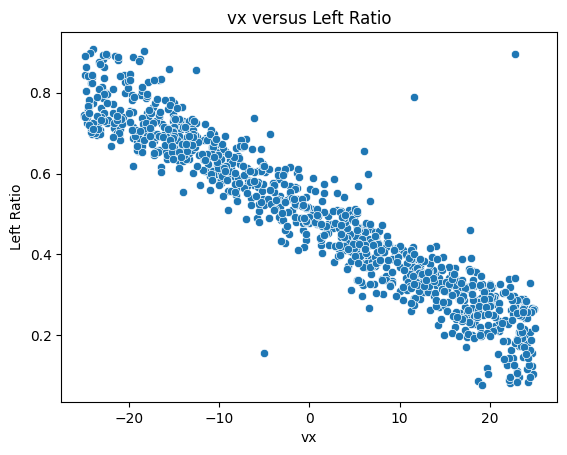

In [48]:
left_ratio = left['total']/df['total']
sns.scatterplot(x=df["vx"],y=left_ratio)
plt.title("vx versus Left Ratio")
plt.ylabel("Left Ratio")
plt.xlabel("vx")

Text(0.5, 0, 'vx')

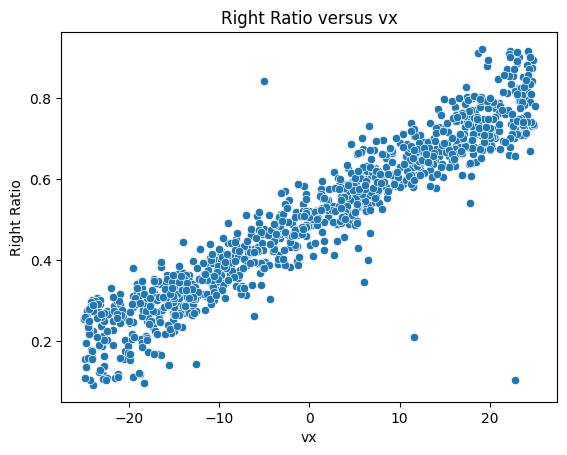

In [49]:
right_ratio = right['total']/df['total']
sns.scatterplot(x=df["vx"],y=right_ratio)
plt.title("Right Ratio versus vx")
plt.ylabel("Right Ratio")
plt.xlabel("vx")

Text(0.5, 0, 'vy')

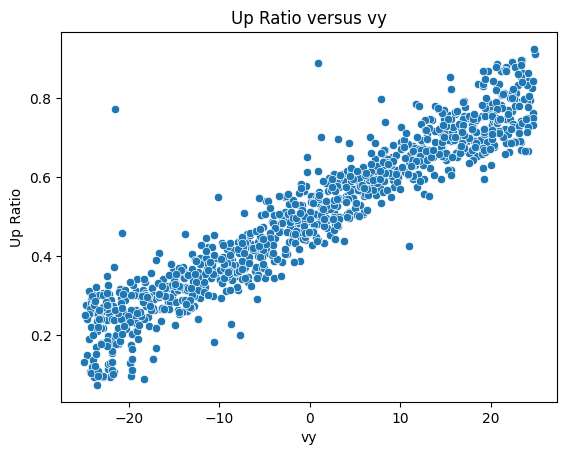

In [50]:
up_ratio = up['total']/df['total']
sns.scatterplot(x=df["vy"],y=up_ratio)
plt.title("Up Ratio versus vy")
plt.ylabel("Up Ratio")
plt.xlabel("vy")

Text(0.5, 0, 'vy')

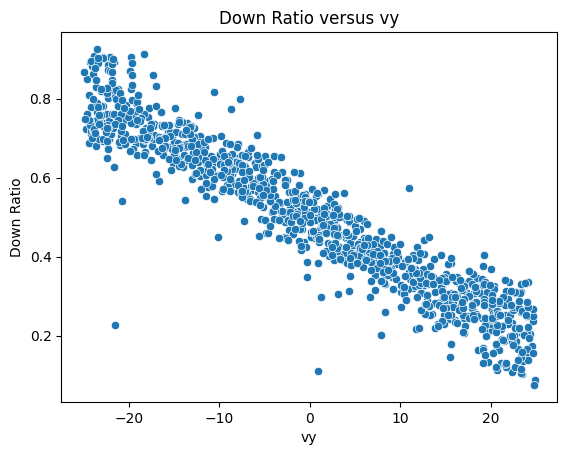

In [51]:
down_ratio = down['total']/df['total']
sns.scatterplot(x=df["vy"],y=down_ratio)
plt.title("Down Ratio versus vy")
plt.ylabel("Down Ratio")
plt.xlabel("vy")

## Curve Fits

Text(0.5, 1.0, 'y vertex versus ratio')

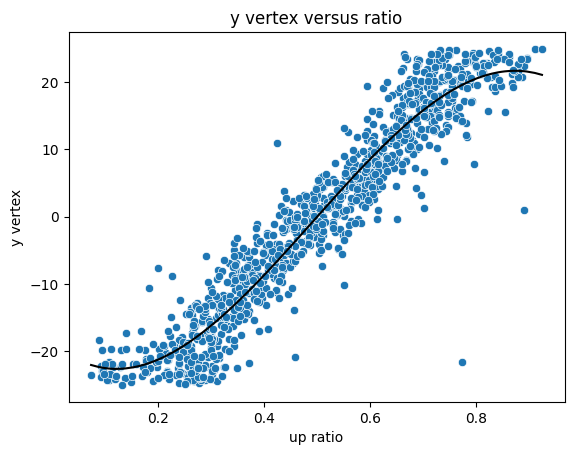

In [52]:
p = np.poly1d(np.polyfit(x=up_ratio,y=up['vy'],deg=4))
sns.scatterplot(x=up_ratio,y=up['vy'])
sns.lineplot(x=up_ratio,y=p(up_ratio),c='black')
plt.xlabel('up ratio')
plt.ylabel('y vertex')
plt.title('y vertex versus ratio')

Text(0.5, 1.0, 'x vertex versus ratio')

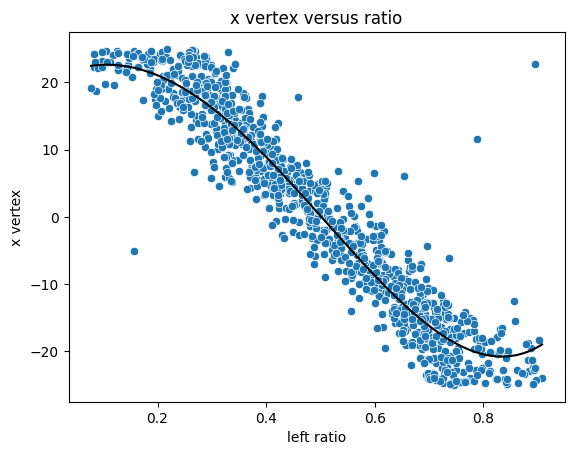

In [53]:
p = np.poly1d(np.polyfit(x=left_ratio,y=left['vx'],deg=4))
sns.scatterplot(x=left_ratio,y=up['vx'])
sns.lineplot(x=left_ratio,y=p(left_ratio),c='black')
plt.xlabel('left ratio')
plt.ylabel('x vertex')
plt.title('x vertex versus ratio')

## Error Plots

Text(0.5, 1.0, 'Y Error versus vy')

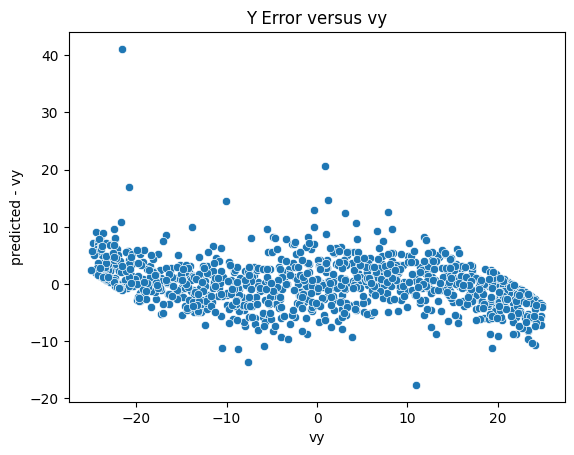

In [81]:
p = np.poly1d(np.polyfit(x=up_ratio,y=up['vy'],deg=3))
sns.scatterplot(x=up['vy'],y=p(up_ratio)-up['vy'])
plt.ylabel('predicted - vy')
plt.title('Y Error versus vy')

Text(0.5, 1.0, 'Y Error versus vz')

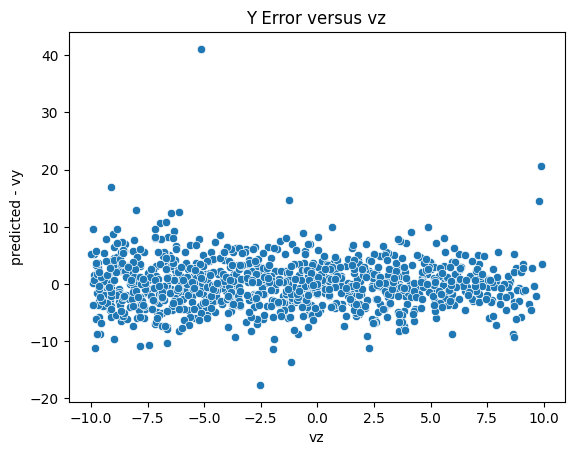

In [82]:
sns.scatterplot(x=up['vz'],y=p(up_ratio)-up['vy'])
plt.ylabel('predicted - vy')
plt.title('Y Error versus vz')

Text(0.5, 1.0, 'X Error versus vx')

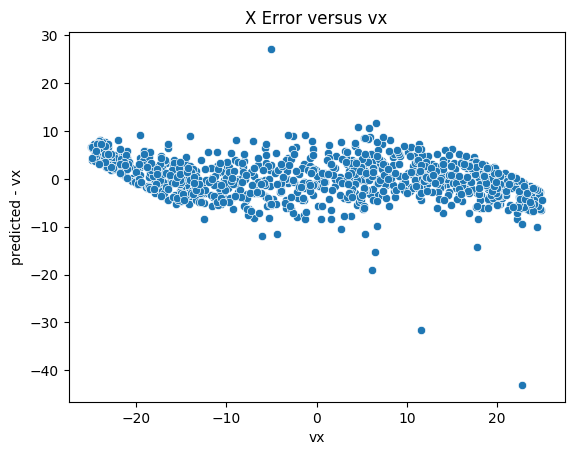

In [80]:
p = np.poly1d(np.polyfit(x=left_ratio,y=left['vx'],deg=3))
sns.scatterplot(x=left['vx'],y=p(left_ratio)-left['vx'])
plt.ylabel('predicted - vx')
plt.title('X Error versus vx')

Text(0.5, 1.0, 'X Error versus vz')

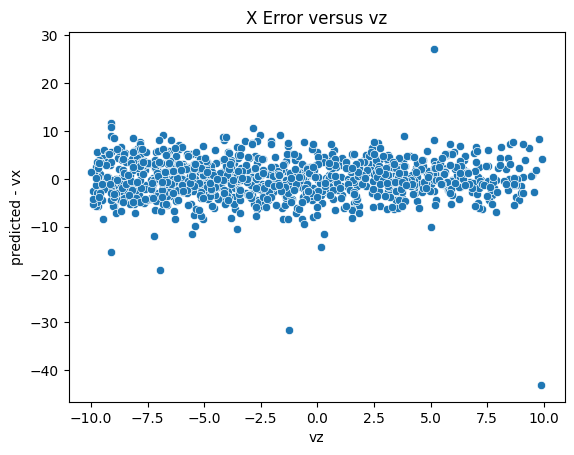

In [79]:
sns.scatterplot(x=left['vz'],y=p(left_ratio)-left['vx'])
plt.ylabel('predicted - vx')
plt.title('X Error versus vz')

## Standard Deviations

In [54]:
for i in range(5):
    p = np.poly1d(np.polyfit(x=left_ratio,y=left['vx'],deg=i))
    pred = p(left_ratio)
    print(f"Deg = {i}, sd = {np.std(pred-left['vx'])}")

Deg = 0, sd = 14.870492882152698
Deg = 1, sd = 4.668889944391332
Deg = 2, sd = 4.668582126280475
Deg = 3, sd = 4.203816513719563
Deg = 4, sd = 4.199070057799031


In [55]:
for i in range(5):
    p = np.poly1d(np.polyfit(x=up_ratio,y=up['vy'],deg=i))
    pred = p(up_ratio)
    print(f"Deg = {i}, sd = {np.std(pred-up['vy'])}")

Deg = 0, sd = 14.530752440829385
Deg = 1, sd = 4.538628774339829
Deg = 2, sd = 4.538566828579724
Deg = 3, sd = 4.176375789253752
Deg = 4, sd = 4.176316294645062
